# OpenCV fundamentals

![No idea](https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg "I have no idea")



## Python getting started

In [1]:

# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg \
    -O noidea.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# These imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

--2023-03-25 03:07:26--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/noidea.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70503 (69K) [image/jpeg]
Saving to: ‘noidea.jpg’

noidea.jpg          100%[===================>]  68.85K  --.-KB/s    in 0.01s   

2023-03-25 03:07:26 (5.65 MB/s) - ‘noidea.jpg’ saved [70503/70503]

--2023-03-25 03:07:26--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
L

Now we can open an image:

In [2]:
input_image=cv2.imread('noidea.jpg')

We can find out various things about that image

In [3]:
print(input_image.size)

776250


In [4]:
print(input_image.shape)



(414, 625, 3)


In [5]:
print(input_image.dtype)

uint8


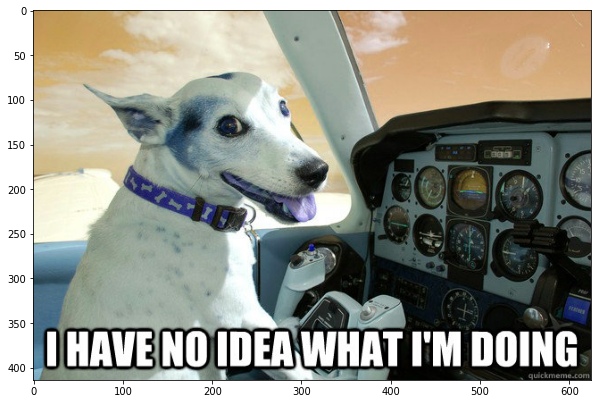

In [6]:
plt.imshow(input_image)

What this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.

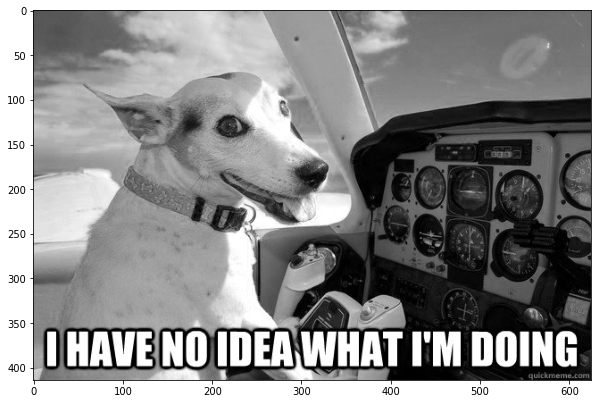

In [7]:
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels (this is red - see that the sky is kind of dark. try changing it to b)
plt.imshow(r, cmap='gray')


## converting between colour spaces, merging and splitting channels

We can convert between various colourspaces in OpenCV easily. We've seen how to split, above. We can also merge channels:

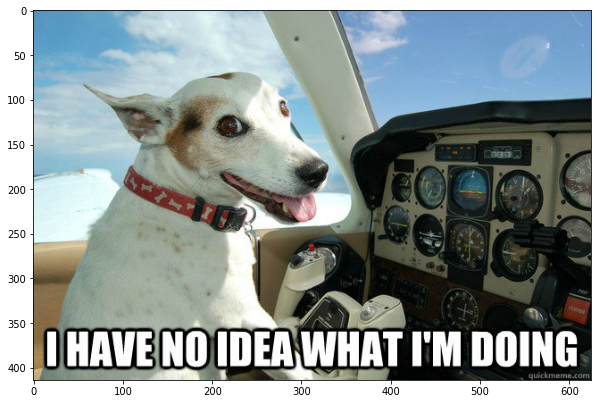

In [8]:
merged=cv2.merge([r,g,b])
# merge takes an array of single channel matrices
plt.imshow(merged)


OpenCV also has a function specifically for dealing with image colorspaces, so rather than split and merge channels by hand you can use this instead. It is usually marginally faster...

There are something like 250 color related flags in OpenCV for conversion and display. The ones you are most likely to use are COLOR_BGR2RGB for RGB conversion, COLOR_BGR2GRAY for conversion to greyscale, and COLOR_BGR2HSV for conversion to Hue,Saturation,Value colour space. 

In [9]:
COLORflags = [flag for flag in dir(cv2) if flag.startswith('COLOR') ]
print(len(COLORflags))

print(COLORflags)

368
['COLORMAP_AUTUMN', 'COLORMAP_BONE', 'COLORMAP_CIVIDIS', 'COLORMAP_COOL', 'COLORMAP_DEEPGREEN', 'COLORMAP_HOT', 'COLORMAP_HSV', 'COLORMAP_INFERNO', 'COLORMAP_JET', 'COLORMAP_MAGMA', 'COLORMAP_OCEAN', 'COLORMAP_PARULA', 'COLORMAP_PINK', 'COLORMAP_PLASMA', 'COLORMAP_RAINBOW', 'COLORMAP_SPRING', 'COLORMAP_SUMMER', 'COLORMAP_TURBO', 'COLORMAP_TWILIGHT', 'COLORMAP_TWILIGHT_SHIFTED', 'COLORMAP_VIRIDIS', 'COLORMAP_WINTER', 'COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BA

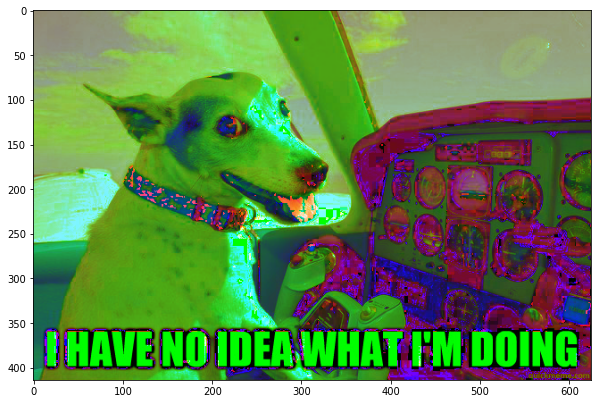

In [10]:
opencv_merged=cv2.cvtColor(input_image, cv2.COLOR_BGR2HLS_FULL)
plt.imshow(opencv_merged)

## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [11]:
pixel = input_image[100,100]
print(pixel)

[150 161 153]


In [12]:
input_image[100,100] = [0,0,0]
pixelnew = input_image[100,100]
print(pixelnew)

[0 0 0]


## Getting and setting regions of an image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on. 

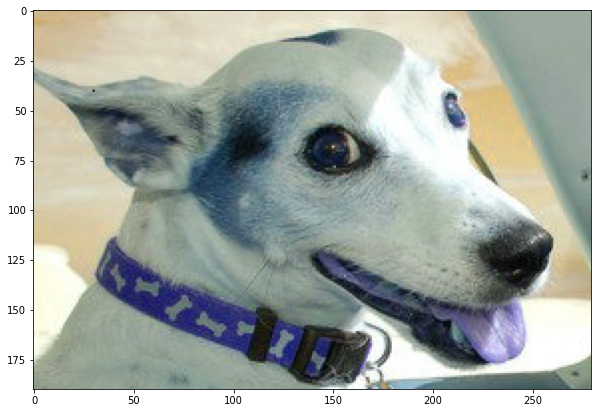

In [13]:
dogface = input_image[60:250, 70:350]
plt.imshow(dogface)

190
280


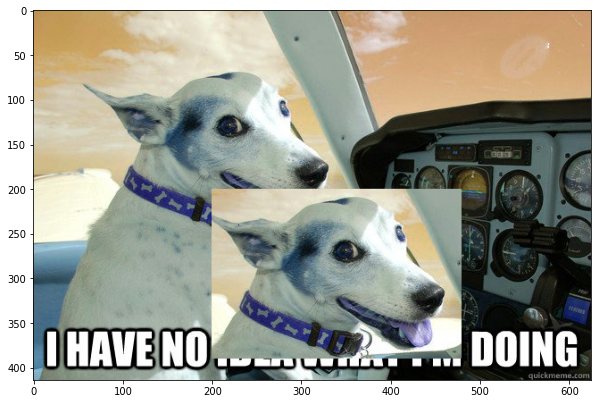

In [14]:
fresh_image=cv2.imread('noidea.jpg') 
fresh_image[200:200+dogface.shape[0], 200:200+dogface.shape[1]]=dogface
print(dogface.shape[0])
print(dogface.shape[1])
plt.imshow(fresh_image)

# Image stats and image processing

## Basic manipulations

Rotate, flip...

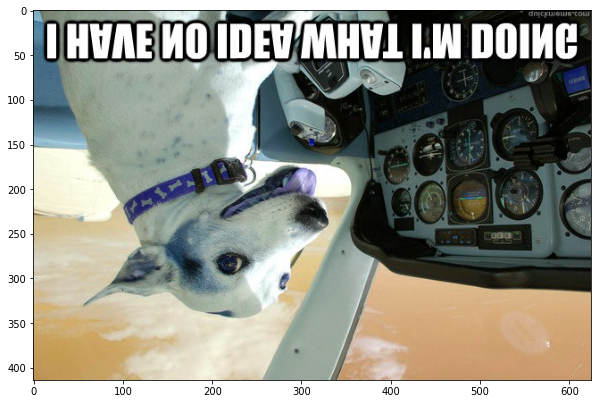

In [15]:
flipped_code_0=cv2.flip(input_image,0) # vertical flip
plt.imshow(flipped_code_0)

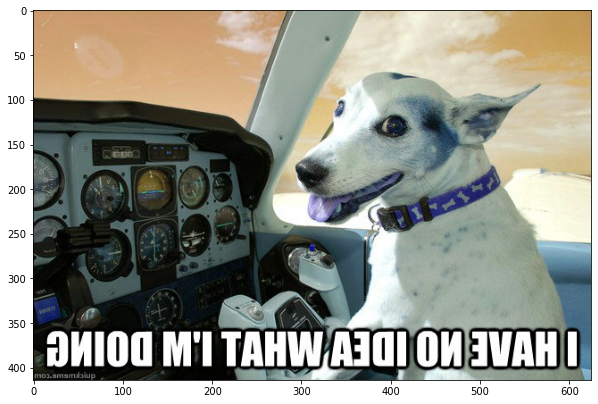

In [16]:
flipped_code_1=cv2.flip(input_image,1) # horizontal flip
plt.imshow(flipped_code_1)

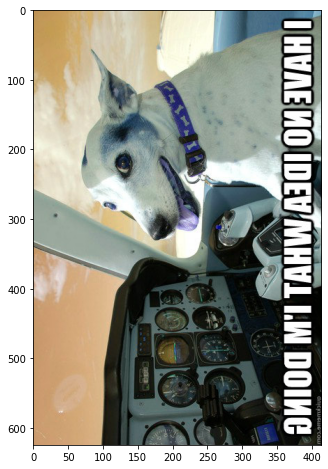

In [17]:
transposed=cv2.transpose(input_image)
plt.imshow(transposed)

## Minimum, maximum

To find the min or max of a matrix, you can use minMaxLoc. This takes a single channel image (it doesn't make much sense to take the max of a 3 channel image). So in the next code snippet you see a for loop, using python style image slicing, to look at each channel of the input image separately. 

In [18]:
for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(input_image[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))


min 0.0 is at (100, 100), and max 255.0 is at (577, 37)
min 0.0 is at (100, 100), and max 255.0 is at (257, 81)
min 0.0 is at (100, 100), and max 255.0 is at (257, 81)


## Arithmetic operations on images

OpenCV has a lot of functions for doing mathematics on images. Some of these have "analogous" numpy alternatives, but it is nearly always better to use the OpenCV version. The reason for this that OpenCV is designed to work on images and so handles overflow better (OpenCV add, for example, truncates to 255 if the datatype is image-like and 8 bit; Numpy's alternative wraps around).

Useful arithmetic operations include add and addWeighted, which combine two images that are the same size. 

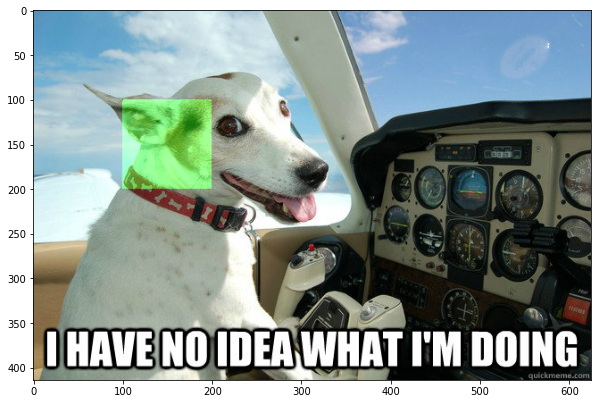

In [19]:
#First create an image the same size as our input
blank_image = np.zeros((input_image.shape), np.uint8)

blank_image[100:200,100:200,1]=100; #give it a green square

new_image=cv2.add(blank_image,input_image) # add the two images together

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

## Noise reduction
Noise reduction usually involves blurring/smoothing an image using a Gaussian kernel.
The width of the kernel determines the amount of smoothing.

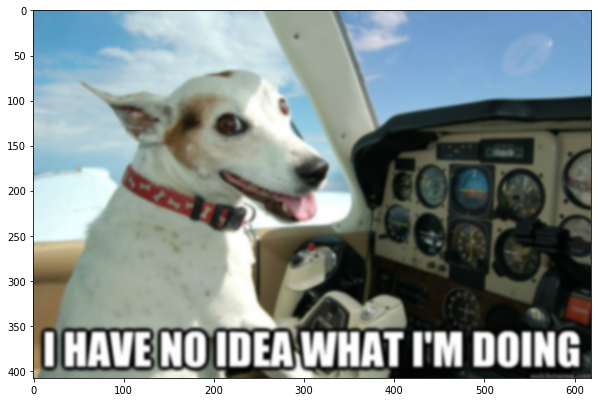

In [20]:
d=3
img_blur3 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur3, cv2.COLOR_BGR2RGB))

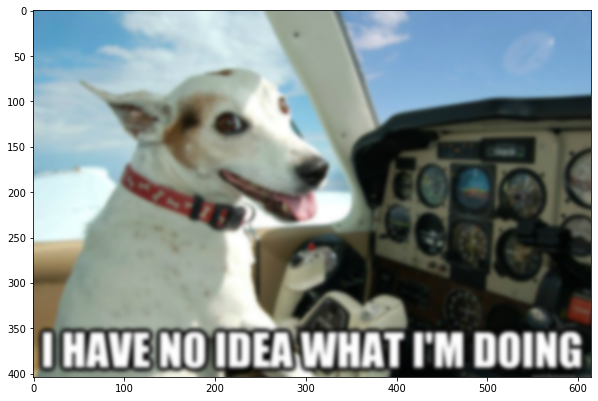

In [21]:
d=5
img_blur5 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur5, cv2.COLOR_BGR2RGB))

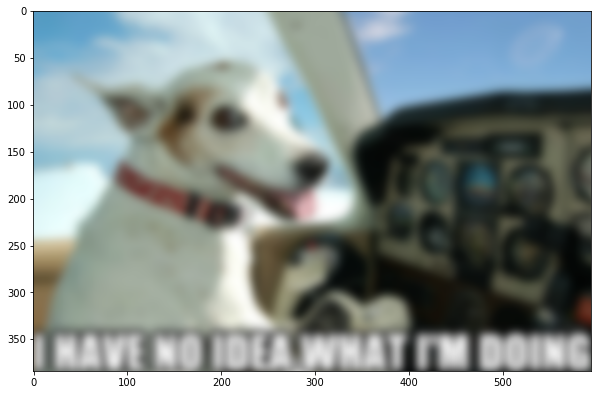

In [22]:
d=15
img_blur15 = cv2.GaussianBlur(input_image, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv2.cvtColor(img_blur15, cv2.COLOR_BGR2RGB))

## Edges

Edge detection is the final image processing technique we're going to look at in this tutorial.

For a lot of what we think of as "modern" computer vision techniques, edge detection functions as a building block. Much edge detection actually works by **convolution**, and indeed **convolutional neural networks** are absolutely the flavour of the month in some parts of computer vision. Sobel's edge detector was one of the first truly successful edge detection (enhancement) technique and that involves convolution at its core. You can read more about the background to Sobel here in the OpenCV docs. 

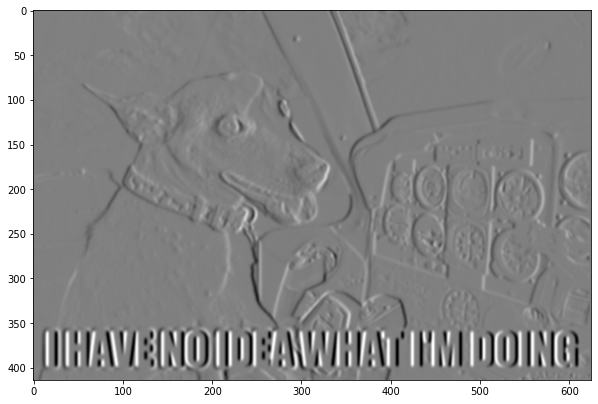

In [23]:
sobelimage=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(sobelimage,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(sobelimage,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap = 'gray') 
# Sobel works in x and in y, change sobelx to sobely in the olt line above to see the difference


Canny edge detection is another winnning technique - it takes two thresholds.
The first one determines how likely Canny is to find an edge, and the second determines how likely it is to follow that edge once it's found. Investigate the effect of these thresholds by altering the values below.

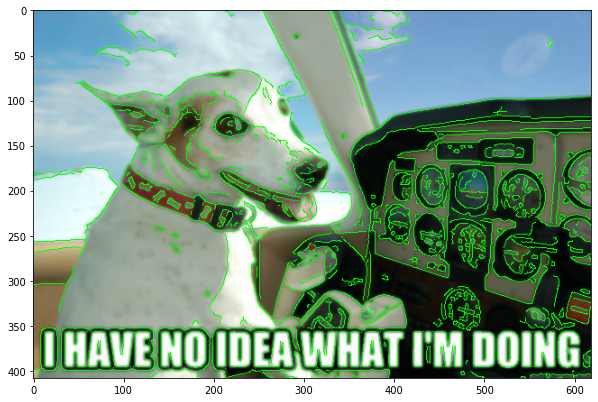

In [24]:
th1=30
th2=60 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
d=3 # gaussian blur

edgeresult=input_image.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 255, 0) # this takes pixels in edgeresult where edge non-zero colours them bright green

plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

## Features in computer vision
### Corner detectors
If you think of edges as being lines, then corners are an obvious choice for features as they represent the intersection of two lines. One of the earlier corner detectors was introduced by Harris, and it is still a very effective corner detector that gets used quite a lot: it's reliable and it's fast. There's a tutorial explaining how Harris works on the OpenCV site 

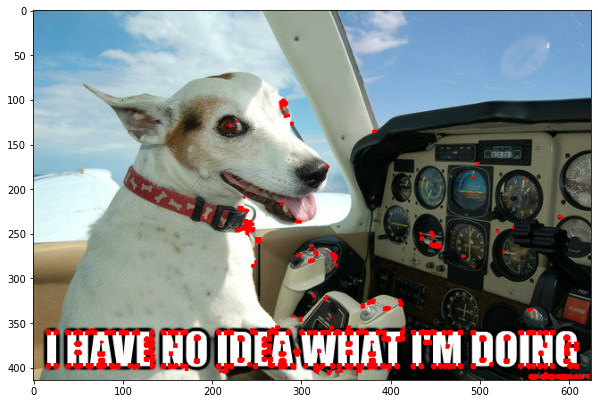

In [25]:
harris_test=input_image.copy()
#greyscale it
gray = cv2.cvtColor(harris_test,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
blocksize=4 # 
kernel_size=3 # sobel kernel: must be odd and fairly small

# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold

#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_test[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(cv2.cvtColor(harris_test, cv2.COLOR_BGR2RGB))

# Image augmentation 


In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import requests
import random

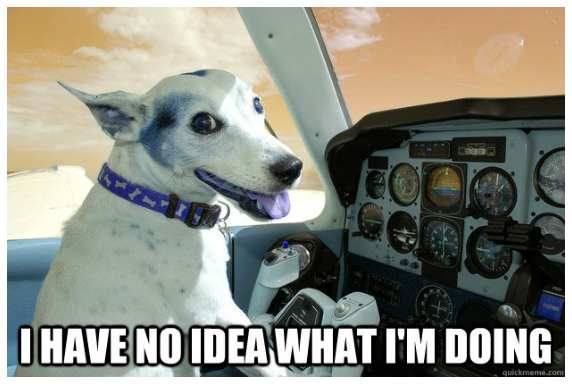

In [ ]:

image = img_to_array(input_image).astype(int)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])

define a helper function to plot the augmented images.

In [30]:
def plot_augmentation(datagen, data, n_rows=1, n_cols=5):
  n_images = n_rows * n_cols
  gen_flow = datagen.flow(data)

  aspect_ratio = data.shape[1] / data.shape[2]
  base_size = 2
  fig_size = (n_cols*base_size/aspect_ratio, n_rows*base_size)
  fig = plt.figure(figsize=fig_size)

  for image_index in range(n_images):
    image = next(gen_flow)
    plt.subplot(n_rows, n_cols, image_index+1)
    plt.axis('off')
    plt.imshow(image[0], vmin=0, vmax=255)
  fig.tight_layout(pad=0.0)

In [31]:
class CustomDataGenerator(ImageDataGenerator):
  def __init__(self,
               red_range=None,
               green_range=None,
               blue_range=None,
               **kwargs):
    super().__init__(
        preprocessing_function=self.augment_color,
        **kwargs)

    self.red_range = red_range
    self.green_range = green_range
    self.blue_range = blue_range

  def augment_color(self, image):
    '''Takes an input image and returns a modified version of it'''
    channel_ranges = (self.red_range, self.green_range, self.blue_range)
    for channel, channel_range in enumerate(channel_ranges):
      if not channel_range:
        continue  # no range set, so don't change that channel
      scale = random.uniform(channel_range[0], channel_range[1])
      image[:, :, channel] = image[:, :, channel] * scale

    image = np.clip(image, 0, 255)
    return image

In [32]:
datagen = CustomDataGenerator(red_range=(0.3, .7),
                              green_range=(0.3, .7),
                              blue_range=(0.3, .7),
                              brightness_range=(0.0055, .0095),
                              dtype=int)
datagen.fit(data)
plot_augmentation(datagen, data, n_rows=2, n_cols=6)

NameError: ignored

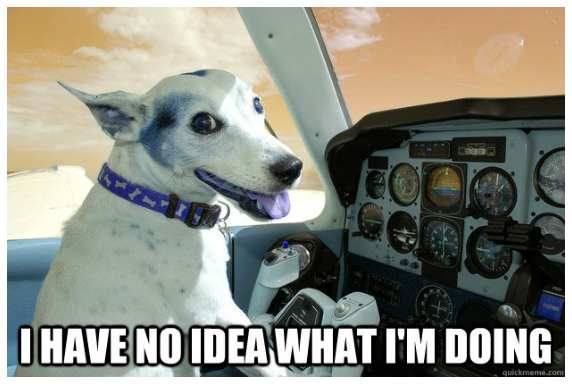

In [33]:

image = img_to_array(input_image).astype(int)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])
data=data*.0042

In [34]:
def default_datagen():
  datagen = ImageDataGenerator( fill_mode='constant', dtype=int)
  datagen.fit(data)
  return datagen

In [35]:
def plot_augmentation(datagen, data, n_rows=1, n_cols=5):
  n_images = n_rows * n_cols
  gen_flow = datagen.flow(data)

  plt.figure(figsize=(n_cols*4, n_rows*3))
  for image_index in range(n_images):
    image = next(gen_flow)
    plt.subplot(n_rows, n_cols, image_index+1)
    plt.axis('off')
    plt.imshow(image[0])

### Width and Height Shift


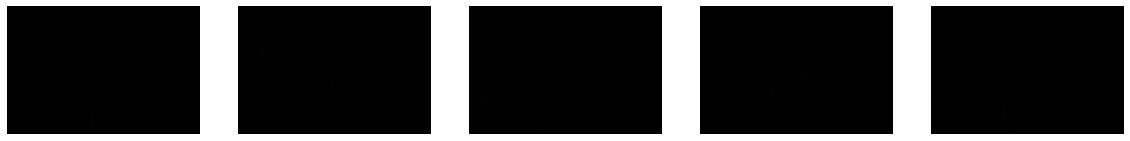

In [36]:
datagen = default_datagen()
datagen.width_shift_range = 0.2
datagen.height_shift_range = 0.2
plot_augmentation(datagen, data)

### Image Flips

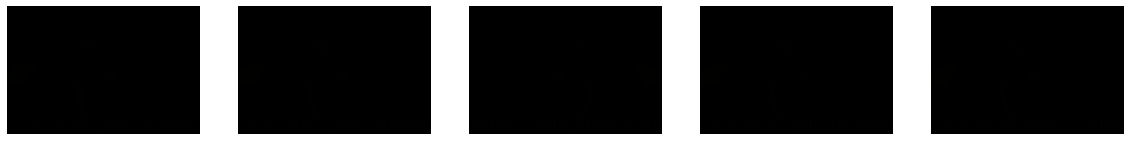

In [37]:
datagen = default_datagen()
datagen.horizontal_flip = True
datagen.vertical_flip = True
plot_augmentation(datagen, data)

### Rotation


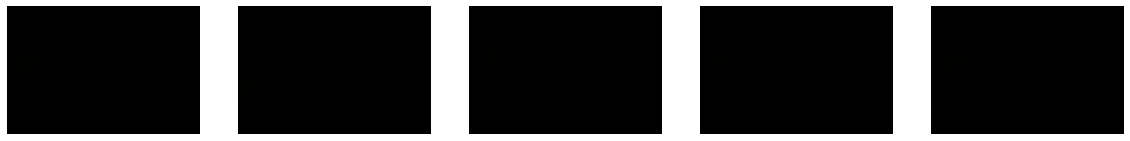

In [38]:
datagen = default_datagen()
datagen.rotation_range = 25
plot_augmentation(datagen, data)

### Zoom

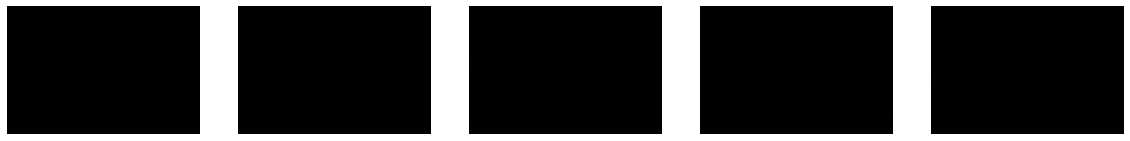

In [39]:
datagen = default_datagen()
datagen.zoom_range = [0.5, 1.5]
plot_augmentation(datagen, data)

### Shear

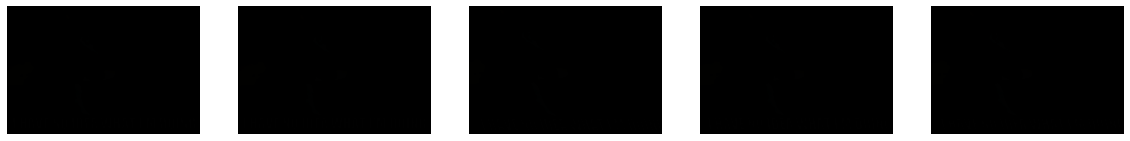

In [40]:
datagen = default_datagen()
datagen.shear_range = 20
plot_augmentation(datagen, data)

### Brightness

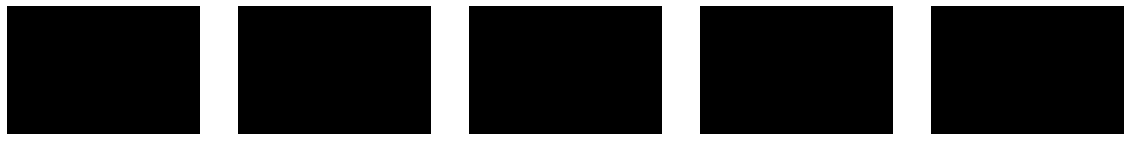

In [41]:
datagen = default_datagen()
datagen.brightness_range = [0.0065, .0090]
plot_augmentation(datagen, data*0.2)

### Combining Multiple Transformations for Data Augmentation

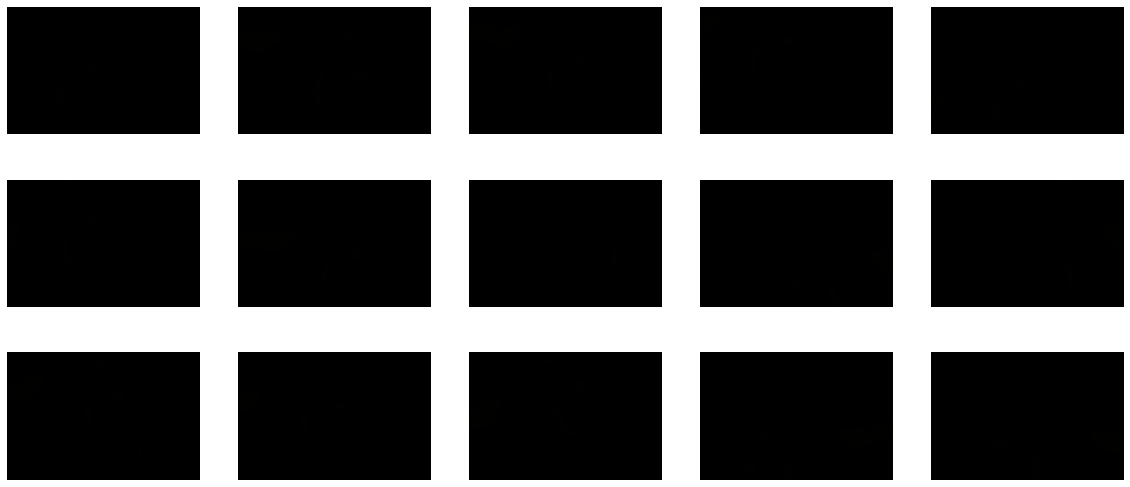

In [43]:
datagen = default_datagen()
datagen.fill_mode='nearest'
datagen.horizontal_flip=True
datagen.width_shift_range=0.2
datagen.height_shift_range=0.2
datagen.zoom_range=[0.8, 1.2]
datagen.rotation_range=20
datagen.shear_range=10
plot_augmentation(datagen, data, n_rows=3, n_cols=5)